# Time Series Analysis: Opening Stock Prices

### Installing and Loading Packages

In [ ]:
# install necessary libraries
install.packages("tidyverse")
install.packages("fpp3")
install.packages("dygraphs")
install.packages("TSA")
install.packages("tseries")
install.packages("devtools")
install.packages("forecast")
install.packages("tsoutliers")
devtools::install_github("IRkernel/repr")

In [1]:
# load packages
library(tidyverse)
library(fpp3)
library(xts)  
library(dygraphs)
library(TSA)
library(repr)
library(tseries)
library(forecast)
library(devtools)
library(tsoutliers)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks sta

### Read Data

In [2]:
# read in data
stock <- read_csv("IBM.csv")

# filter by date and closing price
ibm <- stock %>% 
    filter(Date >= '2019-02-01',  Date <= '2020-02-01')  %>%
    mutate(Date = date(Date)) %>%
    as_tsibble(index = Date) %>%
    select(Date,Close)

ibm


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)




Date,Close
<date>,<dbl>
2019-02-01,134.10
2019-02-04,135.19
2019-02-05,135.55
2019-02-06,136.32
2019-02-07,133.19
2019-02-08,133.71
2019-02-11,133.99
2019-02-12,136.05
2019-02-13,137.52


### Interactive Plot & Correlation

HTML widgets cannot be represented in plain text (need html)


Correlation:  -0.2946004

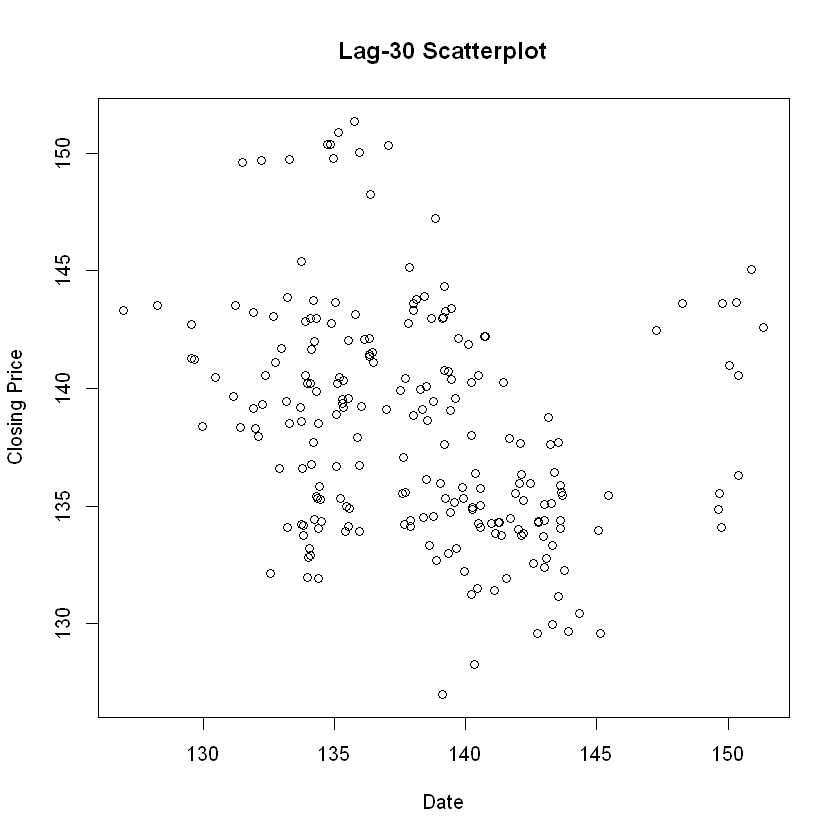

In [9]:
# interactive plot
don <- xts(x = ibm$Close, order.by = ibm$Date)
p <- dygraph(don, main="IBM Closing Prices from 2019-2020") %>%
  dyOptions(labelsUTC = TRUE, fillGraph=TRUE, fillAlpha=0.1, drawGrid = FALSE, colors="darkorange") %>%
  dyRangeSelector() %>%
  dyCrosshair(direction = "vertical") %>%
  dyHighlight(highlightCircleSize = 5, highlightSeriesBackgroundAlpha = 0.2, hideOnMouseOut = FALSE)  %>%
  dyRoller(rollPeriod = 1)
p

# ibm_plot <- ggplot(ibm, aes(x=Date, y=Close)) +
#     geom_line(color="#69b3a2") + 
#     xlab("Date") +
#     ylab("Opening Prices")
# ibm_plot + scale_x_date(date_labels = "%Y %b %d")

#lag plot
plot(y=ibm$Close,x=zlag(ibm$Close,30),
     ylab="Closing Price",xlab="Date",main="Lag-30 Scatterplot")

# Correlation
correlation <- cor(ibm$Close,zlag(ibm$Close,30),use="complete.obs")
cat("\nCorrelation: ", correlation)

# options(repr.plot.width=6, repr.plot.height=6)

### ADF Test

In [251]:
# adf test without transformation
adf.test(ibm$Close)


	Augmented Dickey-Fuller Test

data:  ibm$Close
Dickey-Fuller = -2.8758, Lag order = 6, p-value = 0.207
alternative hypothesis: stationary


**Since p-value = 0.207 > $\alpha$ = 0.05, we fail to reject $H_0$. There is insufficient evidence to indicate that the process
is stationary at a significance level of 0.05.**

****

### Plot of original data

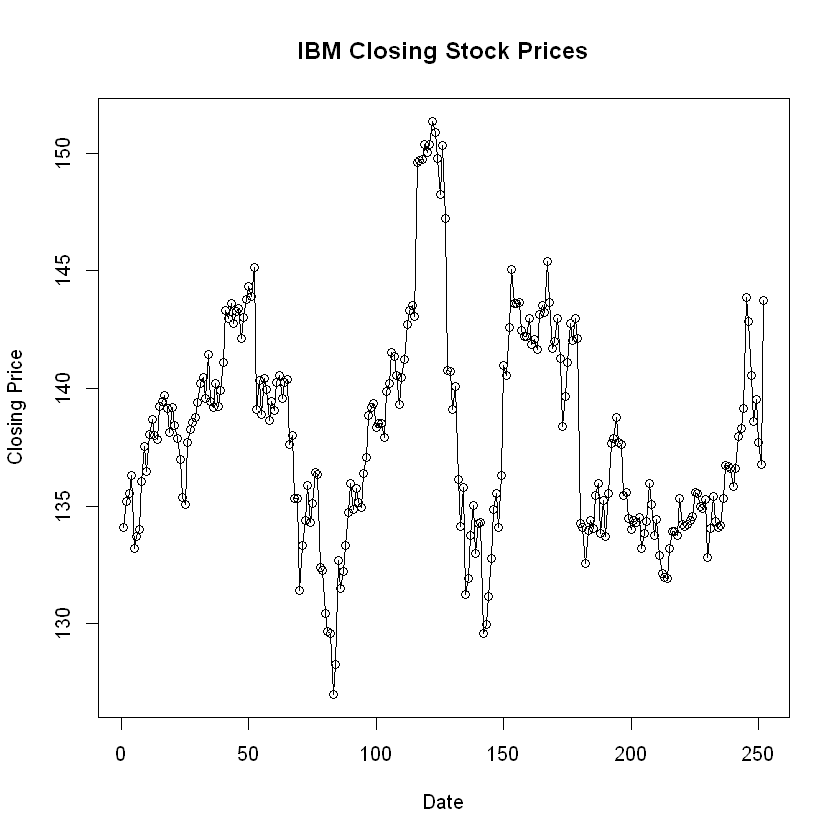

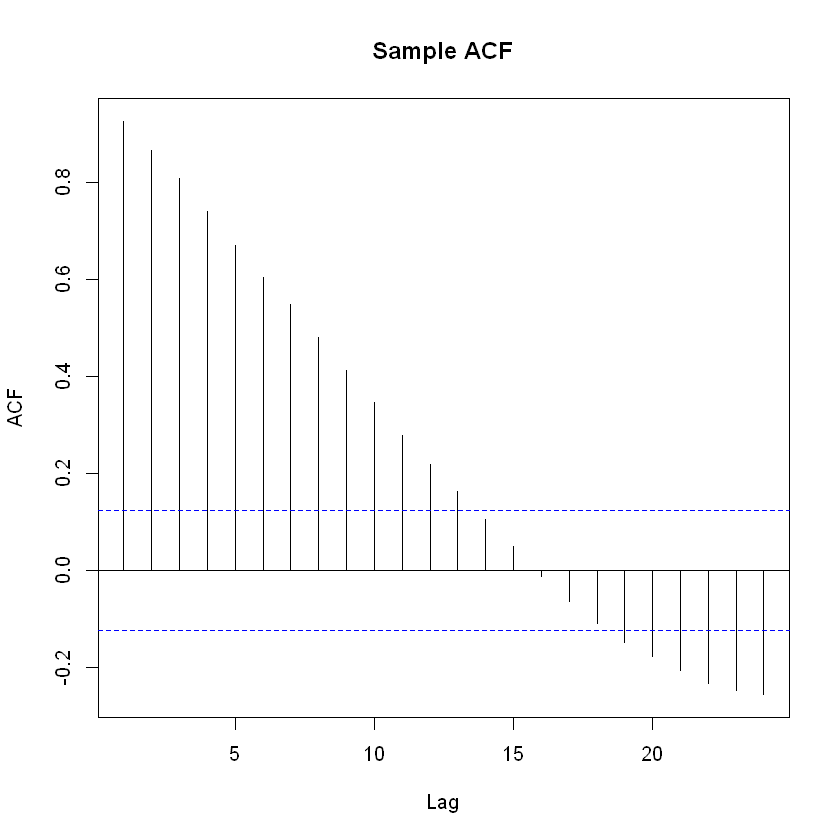

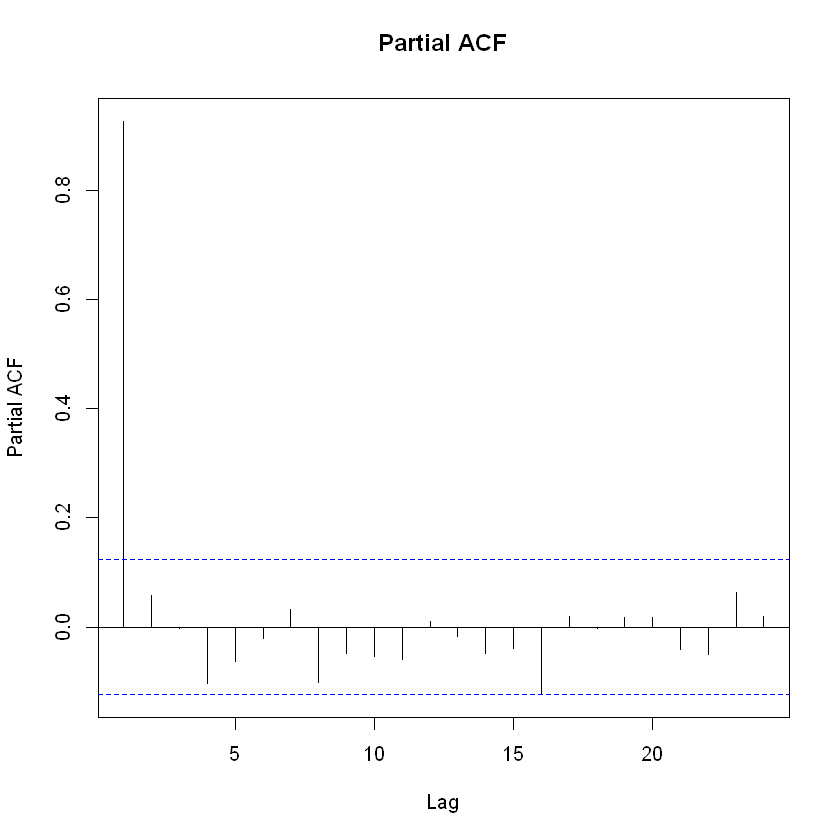

In [10]:
# plot of original data
plot(ibm$Close, ylab="Closing Price", xlab="Date", 
     type="o", main="IBM Closing Stock Prices")

# acf of original
acf(ibm$Close, main="Sample ACF")

#pacf plot
pacf(ibm$Close, main="Partial ACF")

### Check for Tranformation

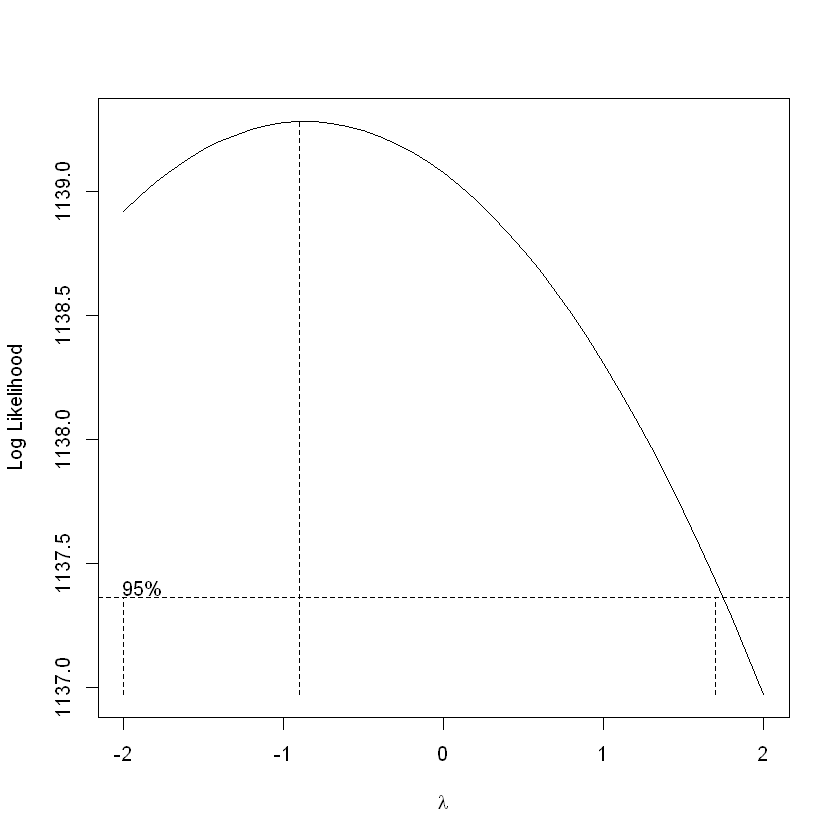

In [4]:
# options(repr.plot.width=6, repr.plot.height=3)

BoxCox.ar(ibm$Close)

In [7]:
# choose lambda = -1
ibm_tranformed <- (ibm$Close)**-1

### Plots of transformed data

$T(Y_t)=Y_t^{-1}$

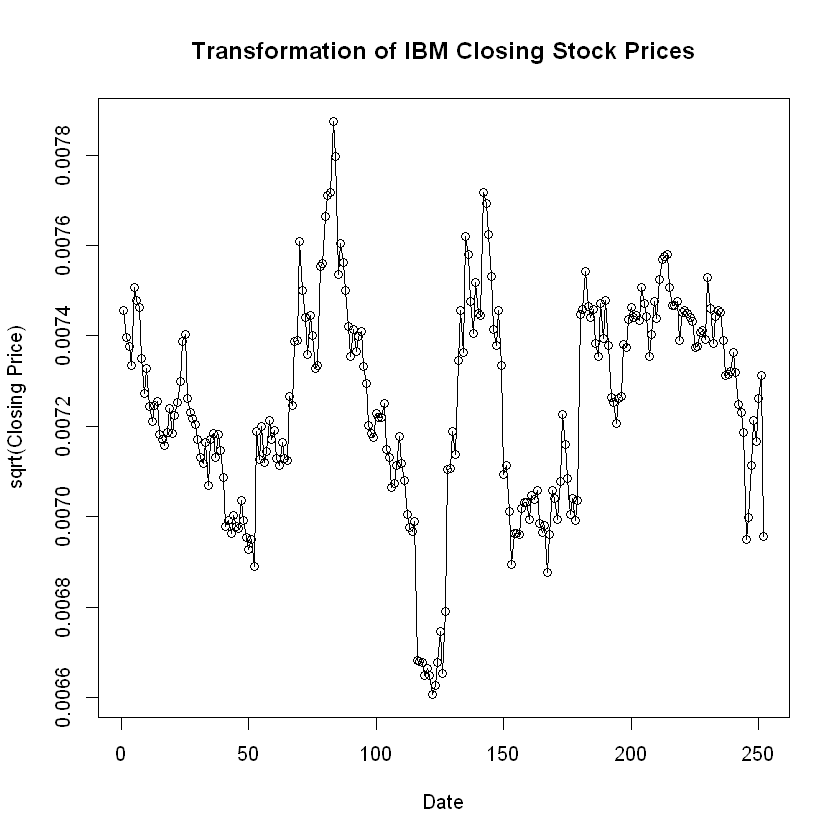

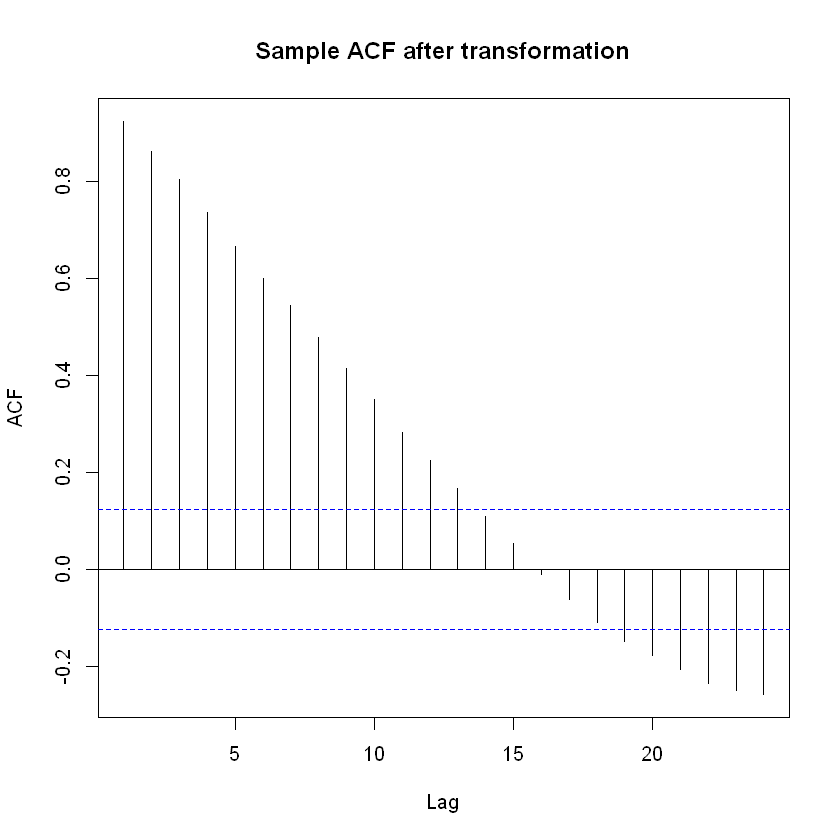

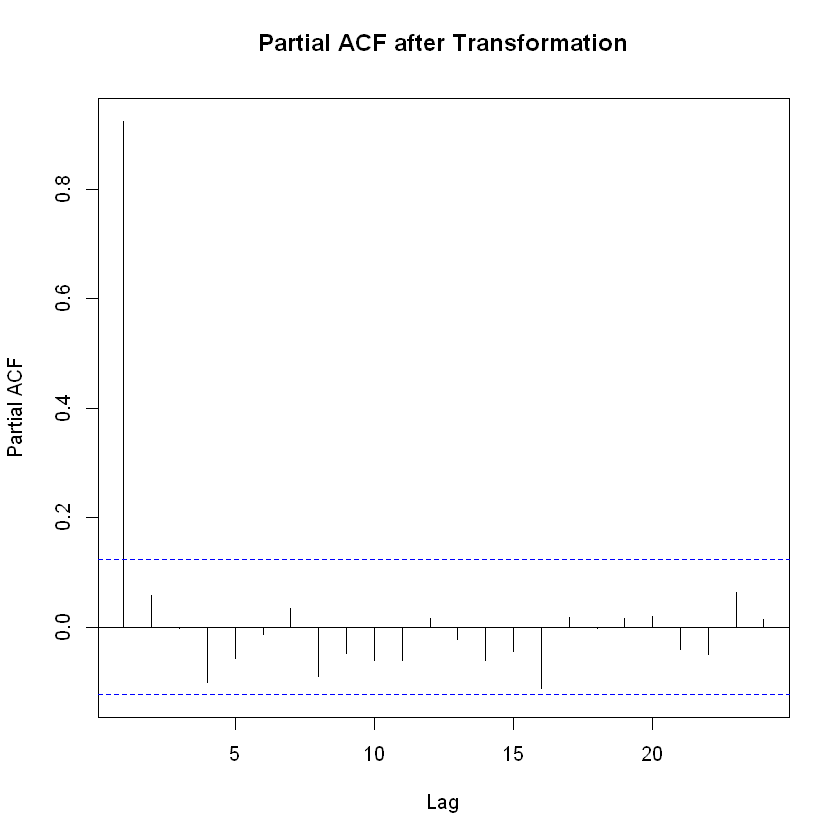

In [9]:
# plot of transformed data
plot(ibm_tranformed, ylab="sqrt(Closing Price)", xlab="Date", 
     type="o", main="Transformation of IBM Closing Stock Prices")

# acf after transformation
acf(ibm_tranformed, main="Sample ACF after transformation")

# pacf after transformation
pacf(ibm_tranformed, main="Partial ACF after Transformation")

### Test for stationarity (ADF Test)

#### ADF test without taking a difference

In [255]:
# adf test without diff
adf.test(ibm_tranformed)


	Augmented Dickey-Fuller Test

data:  ibm_tranformed
Dickey-Fuller = -2.8634, Lag order = 6, p-value = 0.2123
alternative hypothesis: stationary


**Since p-value = 0.2123 > $\alpha$ = 0.05, we fail to reject $H_0$. There is insufficient <br>
evidence to indicate that the process is stationary at a significance level of 0.05. <br>Therefore, a difference is appropriate.**

### 1st Difference of Transformed Data

$\Delta Y_t^-1=(Y_t-Y_{t-1})^{-1}$

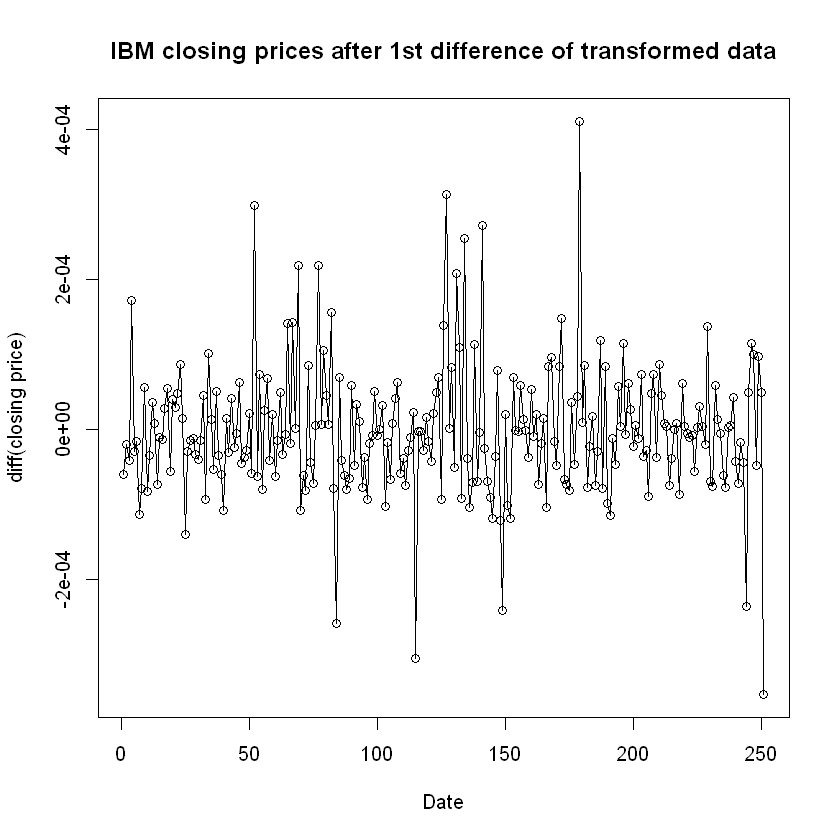

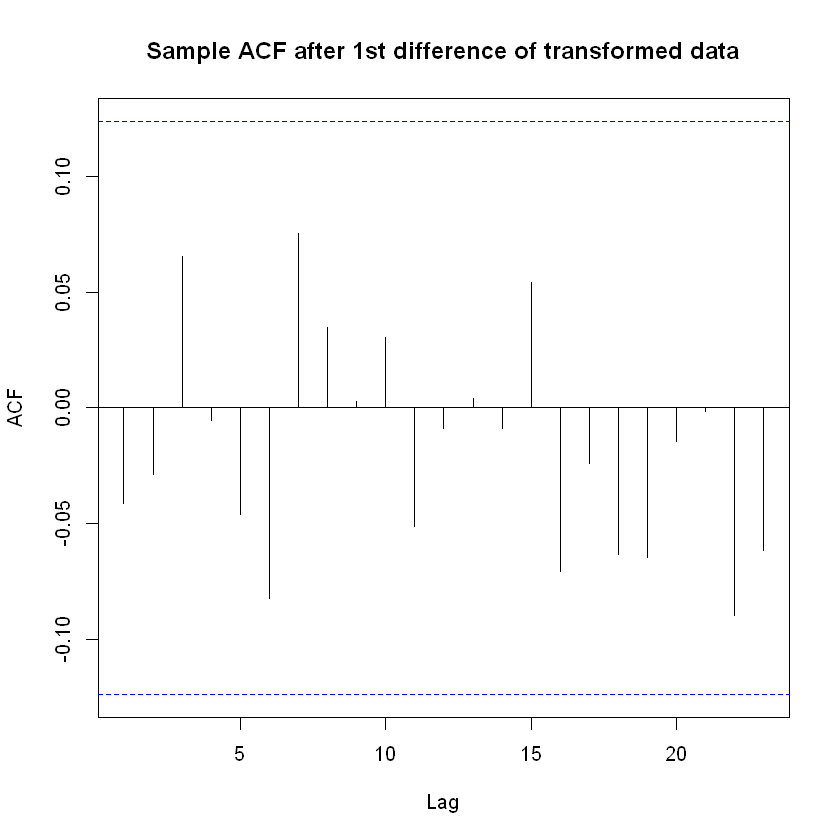

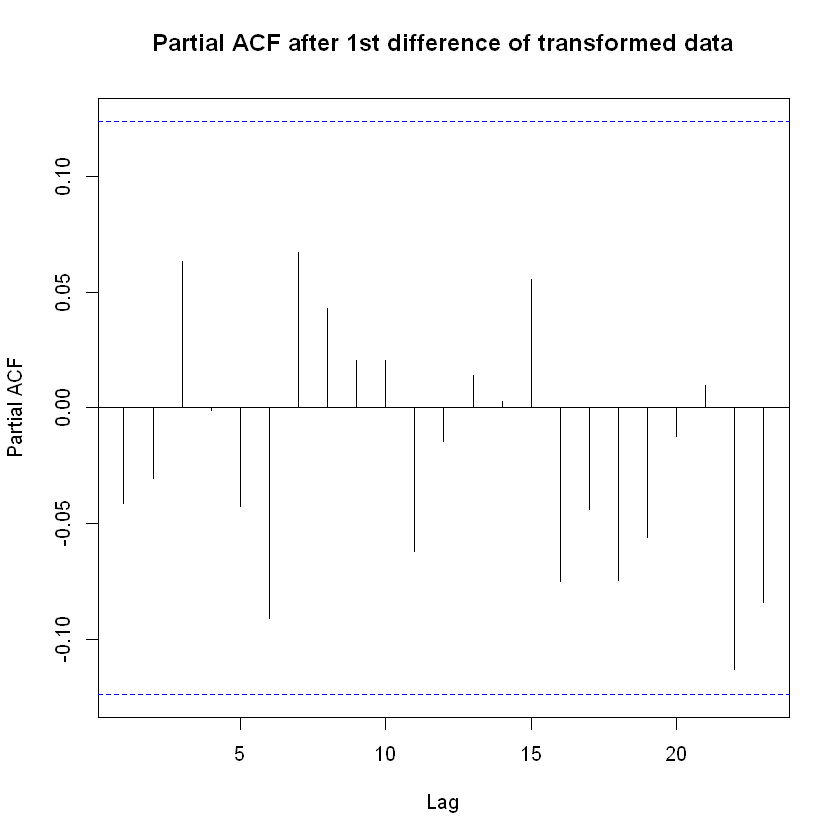

In [256]:
# plot of 1st difference
plot(diff(ibm_tranformed), ylab="diff(closing price)", xlab="Date", 
     type="o", main="IBM closing prices after 1st difference of transformed data")

# 1st difference acf
acf(diff(ibm_tranformed), main="Sample ACF after 1st difference of transformed data")

# 1st difference pacf
pacf(diff(ibm_tranformed), main="Partial ACF after 1st difference of transformed data")

#### EACF

In [257]:
# eacf after taking 1st difference of transformed data
eacf(diff(ibm_tranformed))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 o x x o o o o o o o o  o  o  o 
4 o o x x o o o o o o o  o  o  o 
5 x x x x o o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x o o x x o o o o o o  o  o  o 


**From looking at the tip of the EACF, our principal model would be ARIMA(0,1,0).**

#### ADF test after taking 1st difference

In [258]:
# adf test with 1st diff
adf.test(diff(ibm_tranformed))

Warning message in adf.test(diff(ibm_tranformed)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(ibm_tranformed)
Dickey-Fuller = -5.8877, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


**Since p-value < 0.05 < $\alpha$ = 0.01, we reject $H_0$. There is sufficient evidence to indicate that the <br>first difference of the IBM stock prices process is stationary at a significance level of 0.05.**

## Fit model ARIMA(0,1,0):

Model after inverted first difference: $\Delta Y_t^{-1}=Y_t^{-1}-Y_{t-1}^{-1}=e_t$

#### Fitting the Model

In [259]:
fit.arima010 <- arima(diff(ibm_tranformed),order=c(0,1,0),method = 'ML')
fit.arima010


Call:
arima(x = diff(ibm_tranformed), order = c(0, 1, 0), method = "ML")


sigma^2 estimated as 1.589e-08:  log likelihood = 1889.98,  aic = -3779.96

#### Model Diagnostics

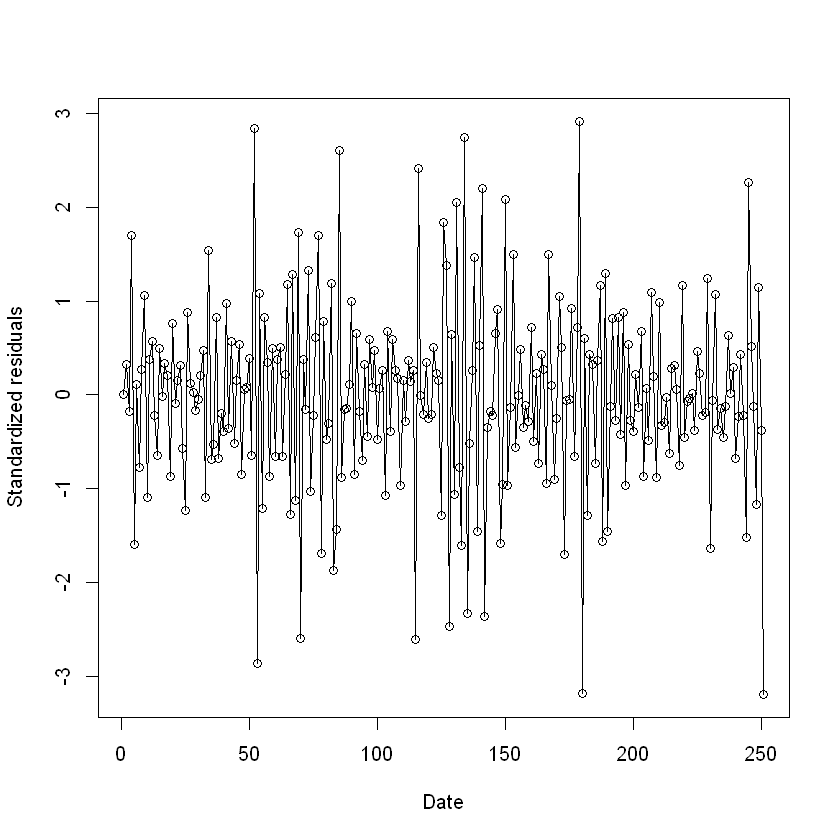

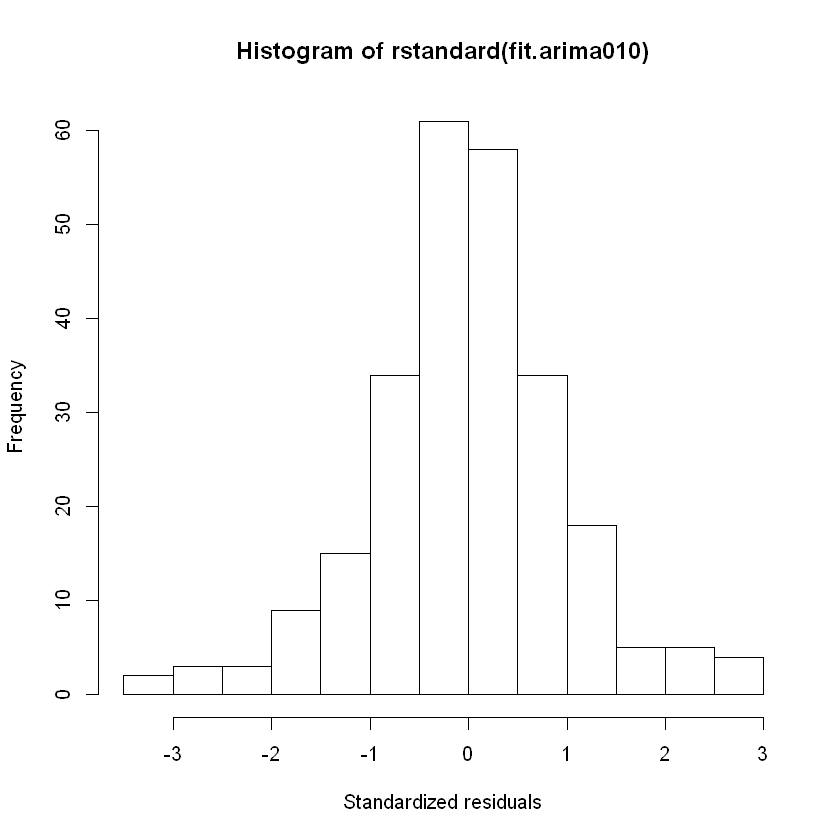

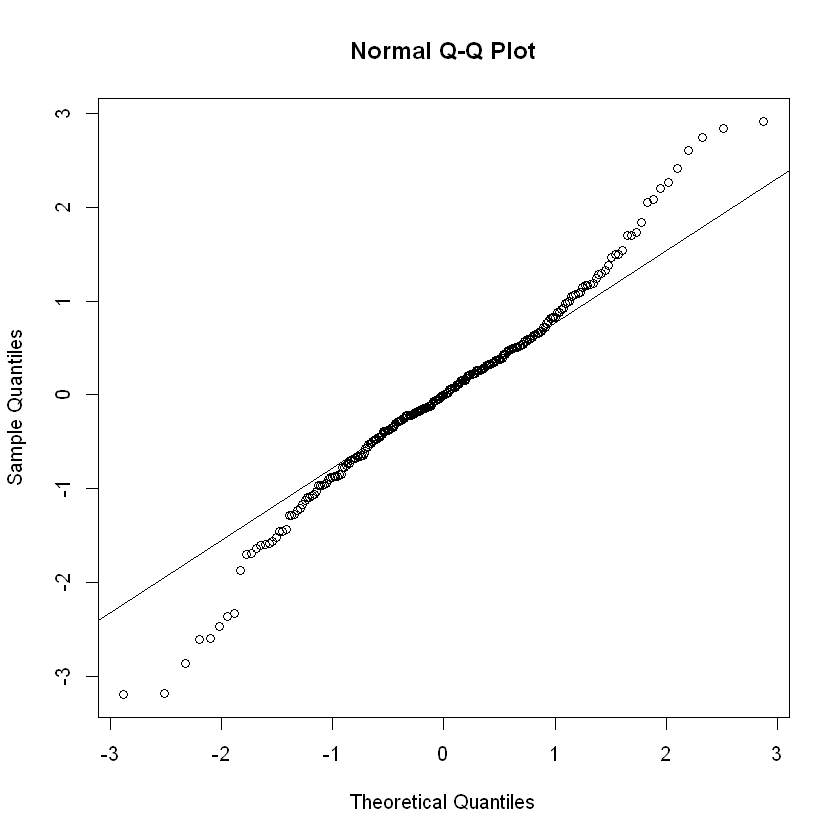

In [175]:
# standardized residuals
plot(rstandard(fit.arima010),xlab="Date",ylab="Standardized residuals",type="o")

# histogram of residuals
hist(rstandard(fit.arima010),xlab="Standardized residuals")

# qqplot
qqnorm(rstandard(fit.arima010))
qqline(rstandard(fit.arima010))

#### Normality Assumption

In [176]:
# Shapiro-Wilk at alpha = 0.05
shapiro.test(rstandard(fit.arima010))


	Shapiro-Wilk normality test

data:  rstandard(fit.arima010)
W = 0.97922, p-value = 0.0009831


**Since the p-value = 0.0009831 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to indiciate that standardized residuals are not normally distributed at a significance level of 0.05. Therefore, normality assumption is not met.**

#### Independence Assumption

In [177]:
# runs test at alpha = 0.05
runs(rstandard(fit.arima010))

$pvalue
[1] 3.28e-07

$observed.runs
[1] 167

$expected.runs
[1] 126.4821

$n1
[1] 127

$n2
[1] 124

$k
[1] 0

   **Since the p-value = 3.28e-07 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to indiciate that standardized residuals are not independent at a significance level of 0.05. Therefore, independence assumption is not met.**

## Overfit Model: ARIMA(0,1,1), ARIMA(1,1,0)

### ARIMA(0,1,1) Model:

Model after inverted first difference: $\Delta Y_t^{-1}=Y_t^{-1}-Y_{t-1}^{-1}+e_t-\theta_1e_{t-1}$

#### Fitting the Model

In [189]:
fit.arima011 <- arima(diff(ibm_tranformed),order=c(0,1,1),method = 'ML')
fit.arima011


Call:
arima(x = diff(ibm_tranformed), order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -1.0000
s.e.   0.0115

sigma^2 estimated as 7.873e-09:  log likelihood = 1974.97,  aic = -3947.95

**The 95% confidence interval for $\hat{\theta}$:**
* -1.0000 $\pm$ 1.96 * 0.0115 = (-1.02254, -0.97746)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

#### Model Diagnostics

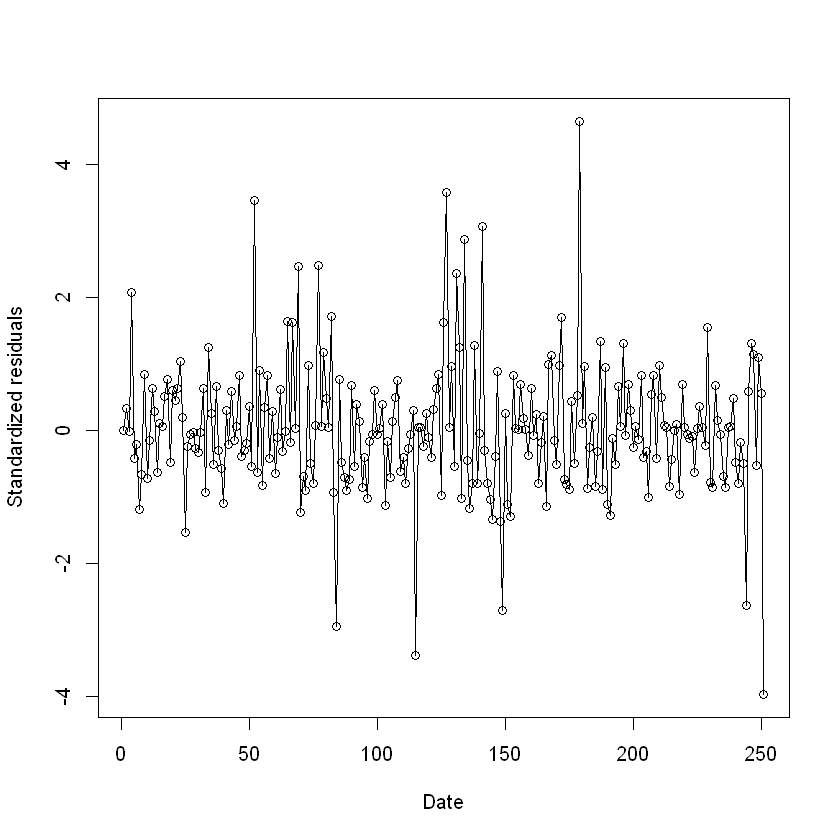

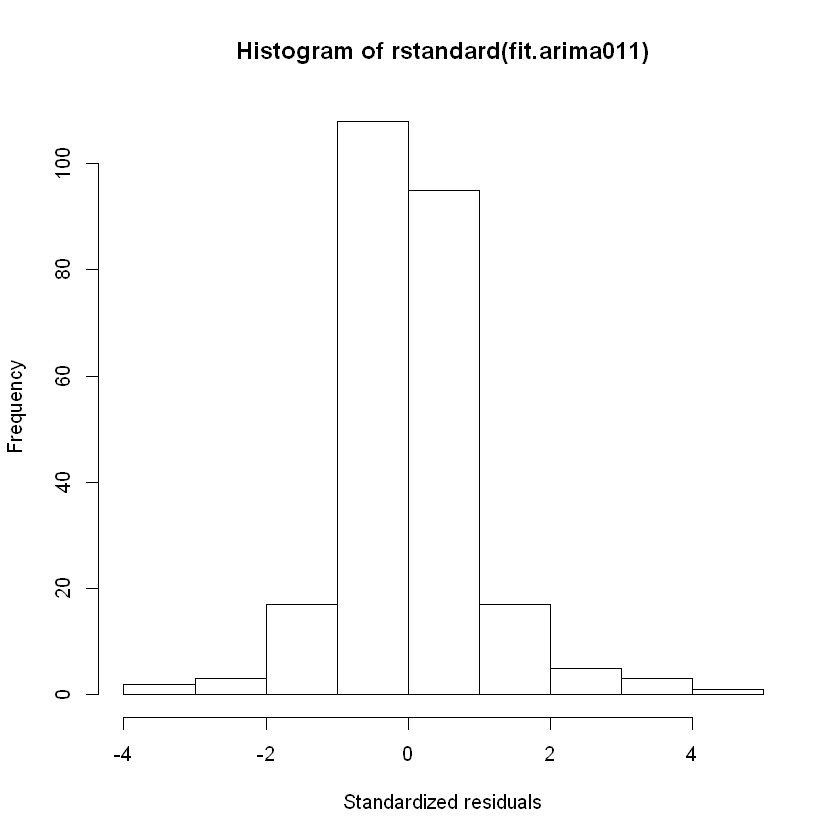

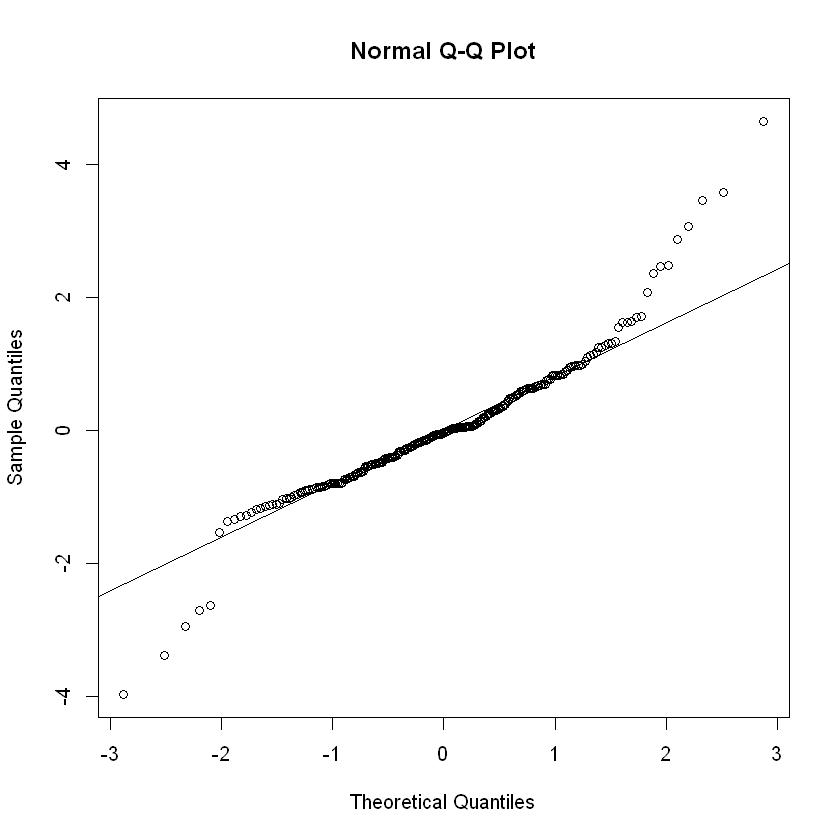

In [190]:
# standardized residuals
plot(rstandard(fit.arima011),xlab="Date",ylab="Standardized residuals",type="o")

# histogram of residuals
hist(rstandard(fit.arima011),xlab="Standardized residuals")

# qqplot
qqnorm(rstandard(fit.arima011))
qqline(rstandard(fit.arima011))

#### Normality Assumption

In [191]:
# Shapiro-Wilk at alpha = 0.05
shapiro.test(rstandard(fit.arima011))


	Shapiro-Wilk normality test

data:  rstandard(fit.arima011)
W = 0.92775, p-value = 1.015e-09


**Since the p-value = 1.015e-09 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to <br>indiciate that standardized residuals are not normally distributed at a significance<br>level of 0.05. Therefore, the normality assumption is not met.**

#### Independence Assumption

In [192]:
# runs test at alpha = 0.05
runs(rstandard(fit.arima011))

$pvalue
[1] 0.784

$observed.runs
[1] 129

$expected.runs
[1] 126.3386

$n1
[1] 130

$n2
[1] 121

$k
[1] 0

**Since the p-value = 0.784 > $\alpha$ = 0.05, we fail to reject $H_0$. There is insufficient evidence to <br>indiciate that standardized residuals are not independent at a significance level of 0.05. <br>Therefore, independence assumption is met.**

### ARIMA(1,1,0) Model:

Model after inverted first difference: $\Delta Y_t^{-1}=\phi(Y_{t-1}-Y_{t-2})^{-1}+e_t$

#### Fitting the Model

In [193]:
fit.arima110 <- arima(diff(ibm_tranformed),order=c(1,1,0),method = 'ML')
fit.arima110


Call:
arima(x = diff(ibm_tranformed), order = c(1, 1, 0), method = "ML")

Coefficients:
          ar1
      -0.5048
s.e.   0.0559

sigma^2 estimated as 1.197e-08:  log likelihood = 1925.19,  aic = -3848.38

**The 95% confidence interval for $\hat{\theta}$:**
* -0.5048 $\pm$ 1.96 * 0.0559 = (-0.614364, -0.395236)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

#### Model Diagnositics

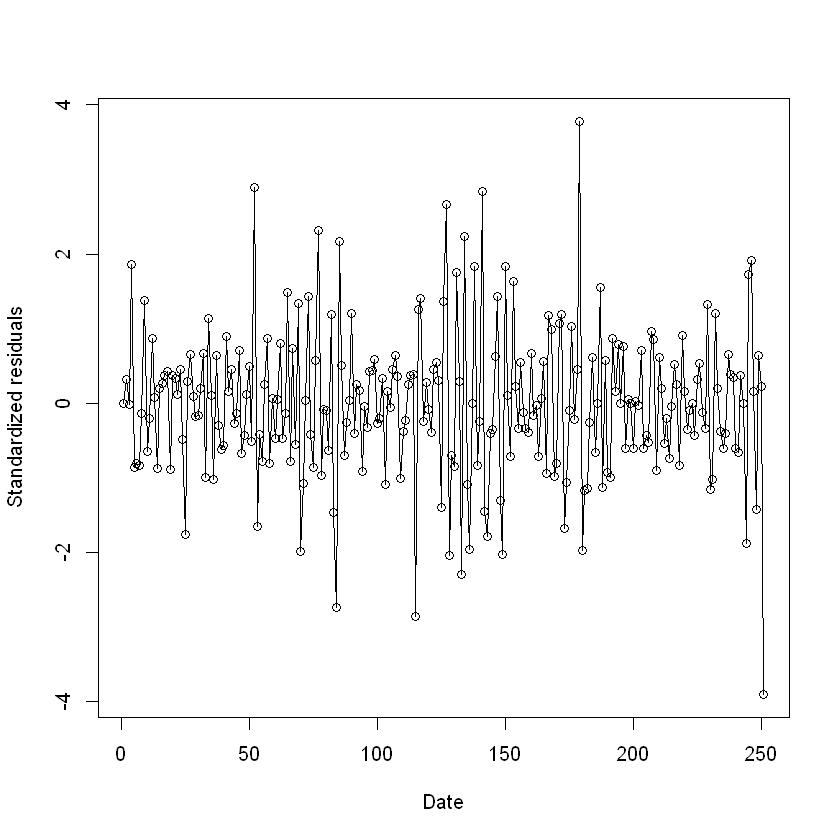

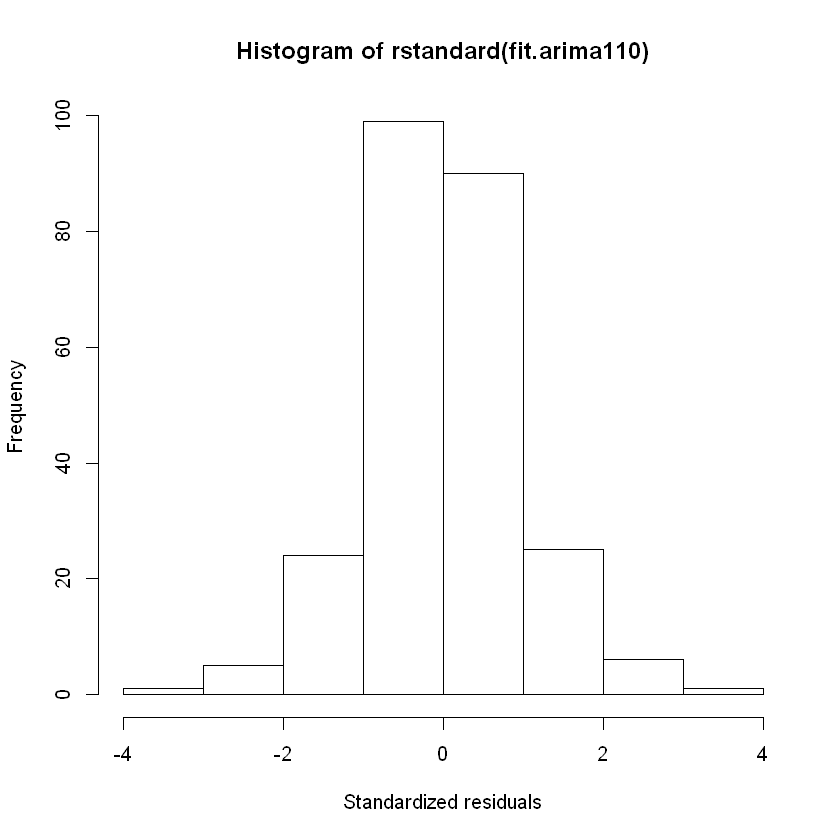

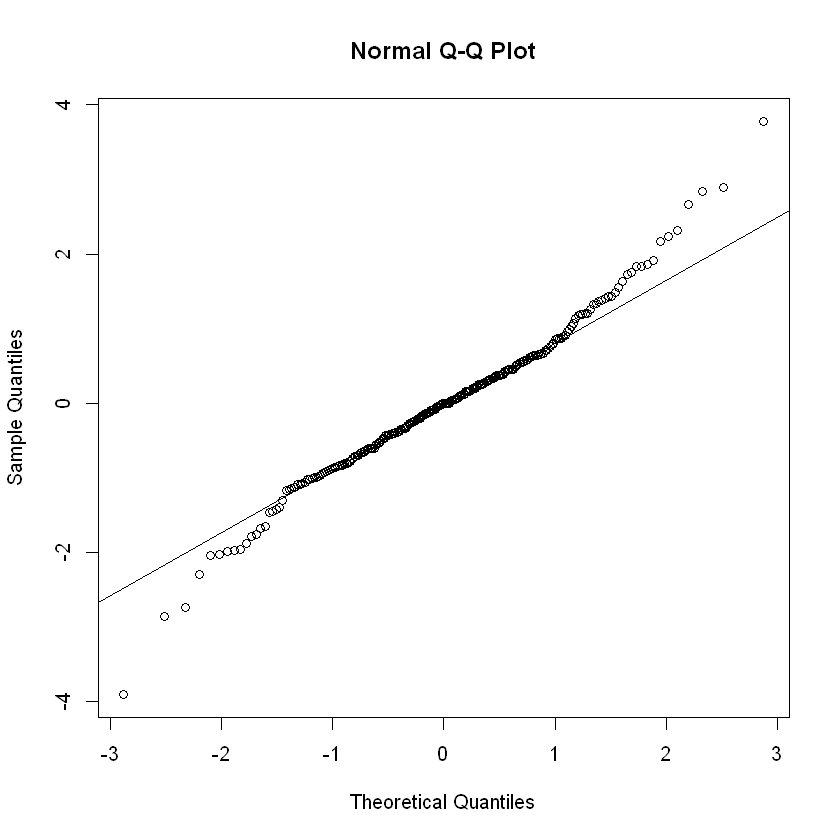

In [194]:
# standardized residuals
plot(rstandard(fit.arima110),xlab="Date",ylab="Standardized residuals",type="o")

# histogram of residuals
hist(rstandard(fit.arima110),xlab="Standardized residuals")

# qqplot
qqnorm(rstandard(fit.arima110))
qqline(rstandard(fit.arima110))

#### Normality Assumption

In [195]:
# Shapiro-Wilk at alpha = 0.05
shapiro.test(rstandard(fit.arima110))


	Shapiro-Wilk normality test

data:  rstandard(fit.arima110)
W = 0.9797, p-value = 0.00118


**Since the p-value = 0.00118 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to <br>indiciate that standardized residuals are not normally distributed at a significance <br>level of 0.05. Therefore, the normality assumption is not met.**

#### Independence Assumption

In [196]:
runs(rstandard(fit.arima110))

$pvalue
[1] 0.201

$observed.runs
[1] 137

$expected.runs
[1] 126.4024

$n1
[1] 129

$n2
[1] 122

$k
[1] 0

**Since the p-value = 0.201 > $\alpha$ = 0.05, we fail to reject $H_0$. There is insufficient evidence <br>to indiciate that standardized residuals are not independent at a significance level of 0.05. <br>Therefore, independence assumption is met.**

#### NOTE: All models failed normality assumption and therefore, we consider taking a 2nd difference.

## Taking 2nd Difference

$\Delta^2Y_t=(Y_t-2Y_{t-1}+Y_{t-2})^{-1}$

### Plots after 2nd difference of transformed data

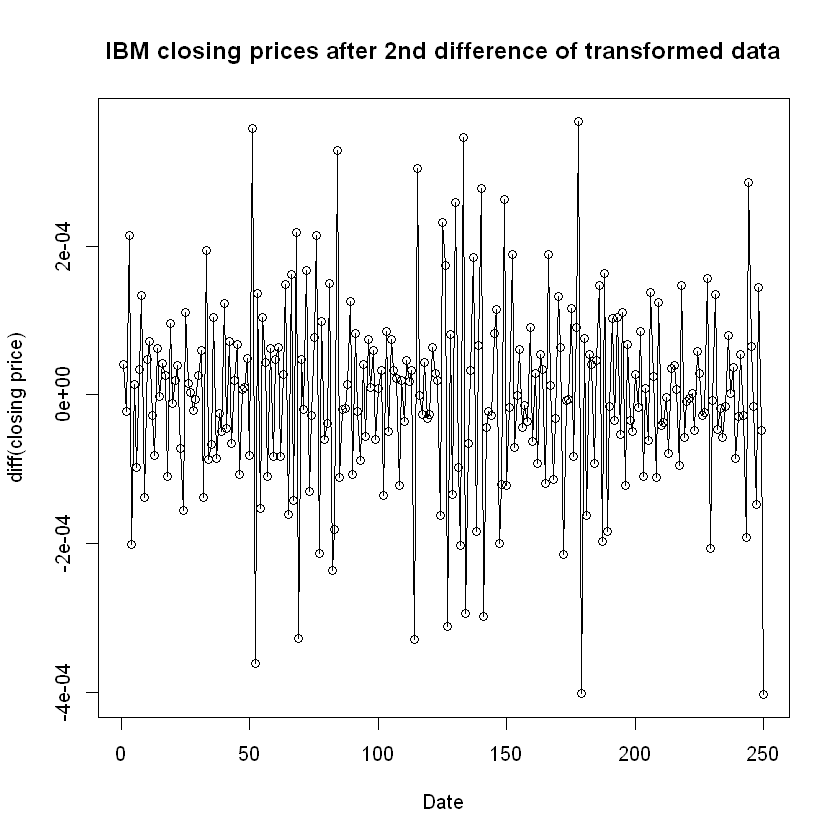

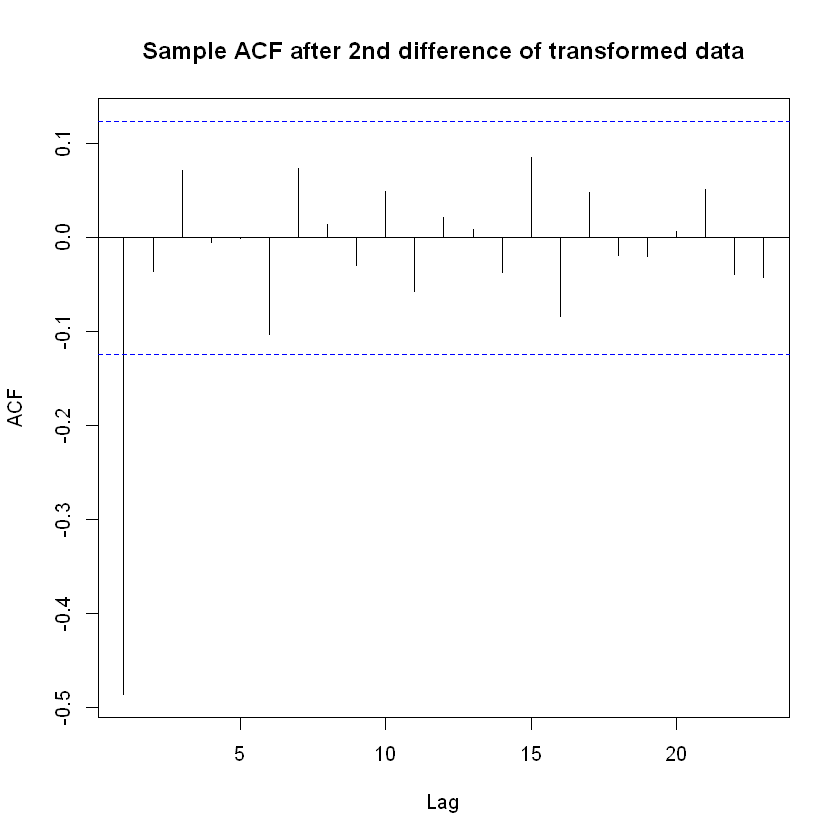

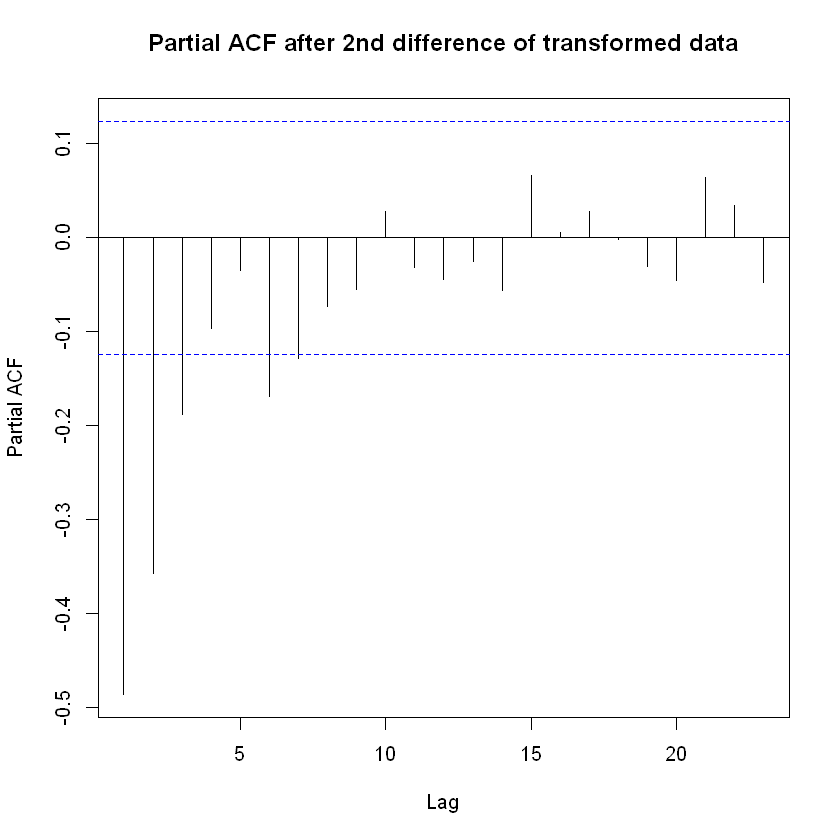

In [197]:
# plot of 2nd difference
plot(diff(diff(ibm_tranformed)), ylab="diff(closing price)", xlab="Date", 
     type="o", main="IBM closing prices after 2nd difference of transformed data")

# 2nd difference acf
acf(diff(diff(ibm_tranformed)), main="Sample ACF after 2nd difference of transformed data")

# 2nd difference pacf
pacf(diff(diff(ibm_tranformed)), main="Partial ACF after 2nd difference of transformed data")


#### EACF

In [198]:
# eacf of 2nd difference of transformed data
eacf(diff(diff(ibm_tranformed)))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 x x o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x x o x o o o o o o o  o  o  o 
4 x o o x o o o o o o o  o  o  o 
5 x x x x x x o o o o o  o  o  o 
6 x o o x x o o o o o o  o  o  o 
7 x x o o x o o o o o o  o  o  o 


**From looking at the tip of the EACF of 2nd difference of transformed data, we can suggest/consider 2 models: ARIMA(0,2,1), ARIMA(2,2,0). Although we would normally consider ARIMA(3,2,1) as a false positive, it is still worth considering.**

### Test for stationarity

In [199]:
# adf test after 2nd difference of transformed data
adf.test(diff(diff(ibm_tranformed)))

Warning message in adf.test(diff(diff(ibm_tranformed))):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(diff(ibm_tranformed))
Dickey-Fuller = -10.437, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


**Since p-value < 0.01 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to
indicate that after <br>taking 2nd difference of transformed data, the process is stationary at a significance level of 0.05.**

## Fit suggested models: ARIMA(0,2,1), ARIMA(2,2,0)

### ARIMA(0,2,1) model:

#### Fitting the model

In [200]:
fit.arima021 <- arima(diff(diff(ibm$Close)),order=c(0,2,1),method = 'ML')
fit.arima021


Call:
arima(x = diff(diff(ibm$Close)), order = c(0, 2, 1), method = "ML")

Coefficients:
          ma1
      -1.0000
s.e.   0.0101

sigma^2 estimated as 17.03:  log likelihood = -706.19,  aic = 1414.39

**95% confidence interval for $\hat{\theta}$**
* -1.00 $\pm$ 1.96 * 0.01 = (-1.0196, -0.9804)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$is signficantly different from 0.

#### Model Diagnostics

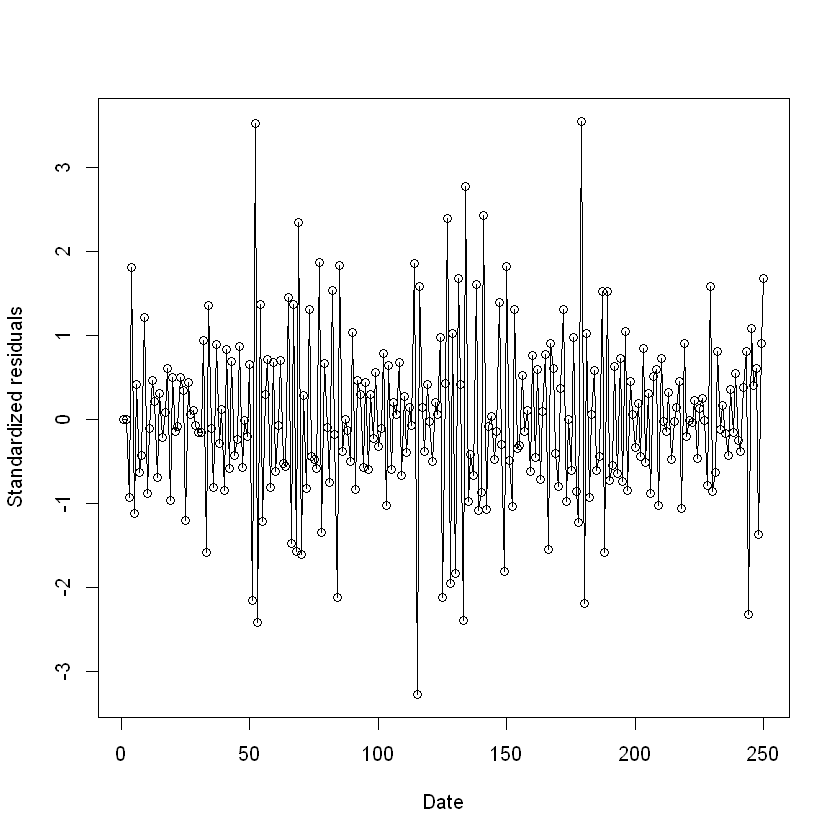

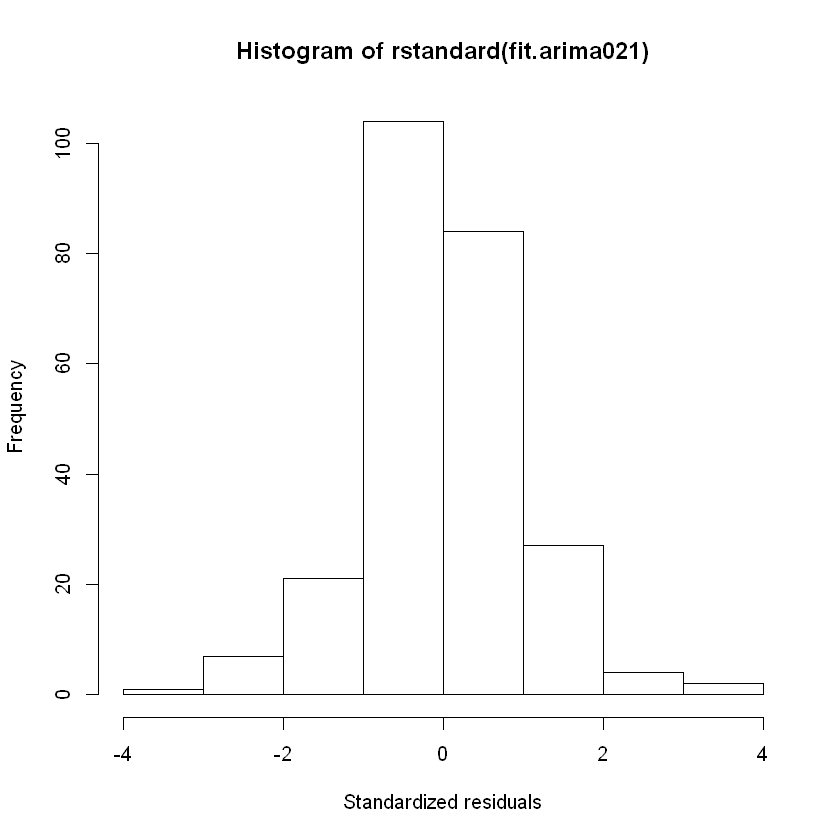

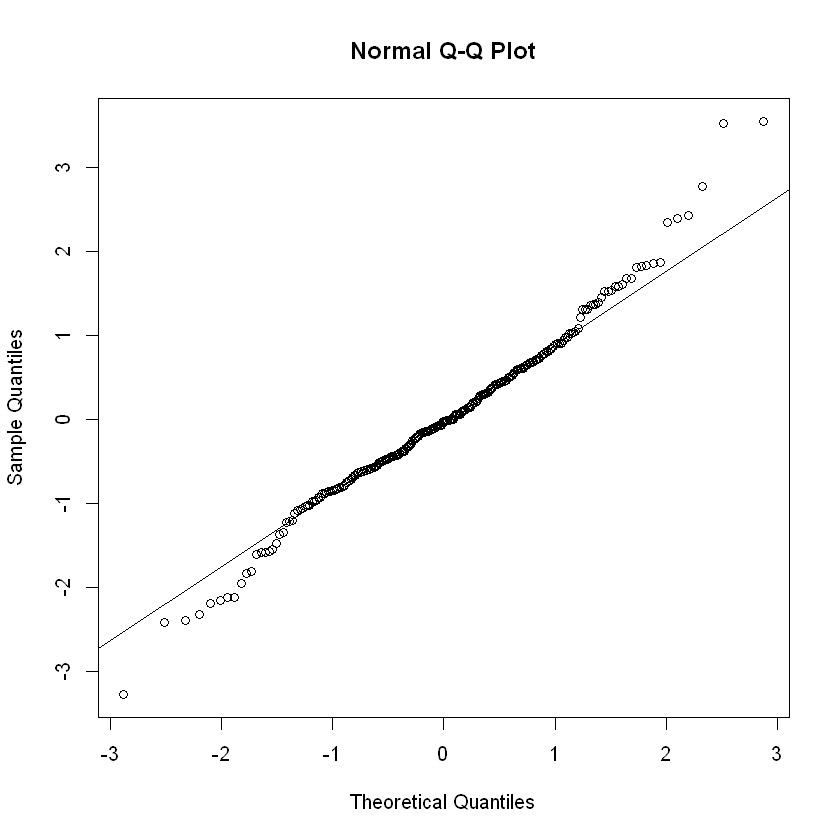

In [201]:
# standardized residuals
plot(rstandard(fit.arima021),xlab="Date",ylab="Standardized residuals",type="o")

# histogram of residuals
hist(rstandard(fit.arima021),xlab="Standardized residuals")

# qqplot
qqnorm(rstandard(fit.arima021))
qqline(rstandard(fit.arima021))

#### Normal Assumption

In [202]:
# shapiro-wilk at alpha = 0.05
shapiro.test(rstandard(fit.arima021))


	Shapiro-Wilk normality test

data:  rstandard(fit.arima021)
W = 0.98402, p-value = 0.006643


**Since the p-value = 0.006643 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to <br>indiciate that standardized residuals are not normally distributed at a significance <br>level of 0.05. Therefore, the normality assumption is not met.**

#### Independence Assumption

In [203]:
runs(rstandard(fit.arima021))

$pvalue
[1] 3.49e-13

$observed.runs
[1] 182

$expected.runs
[1] 125.488

$n1
[1] 133

$n2
[1] 117

$k
[1] 0

**Since the p-value = 3.49e-13 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence <br>to indiciate that standardized residuals are not independent at a significance level  <br>of 0.05. Therefore, independence assumption is not met.**

## ARIMA(2,2,0) model:

#### Fitting the model

In [212]:
fit.arima220 <- arima(diff(diff(ibm_tranformed)),order=c(2,2,0),method = 'ML')
fit.arima220


Call:
arima(x = diff(diff(ibm_tranformed)), order = c(2, 2, 0), method = "ML")

Coefficients:
          ar1      ar2
      -1.1943  -0.6258
s.e.   0.0500   0.0502

sigma^2 estimated as 4.358e-08:  log likelihood = 1748.84,  aic = -3493.68

**MA1: 95% confidence interval for $\hat{\theta}$**
* -1.9959 $\pm$ 1.96 * 0.0154 = (-2.026084, -1.965716)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

**MA2: 95% confidence interval for $\hat{\theta}$**
* 0.9998 $\pm$ 1.96 * 0.0144 = (0.971576, 1.028024)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$is signficantly different from 0.

#### Model Diagnostics

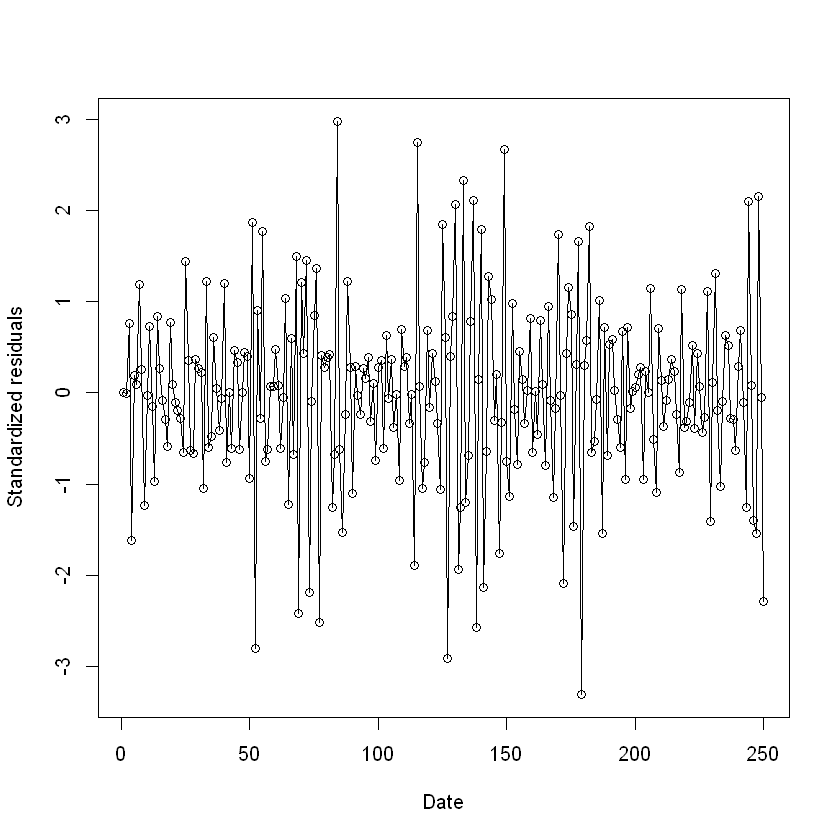

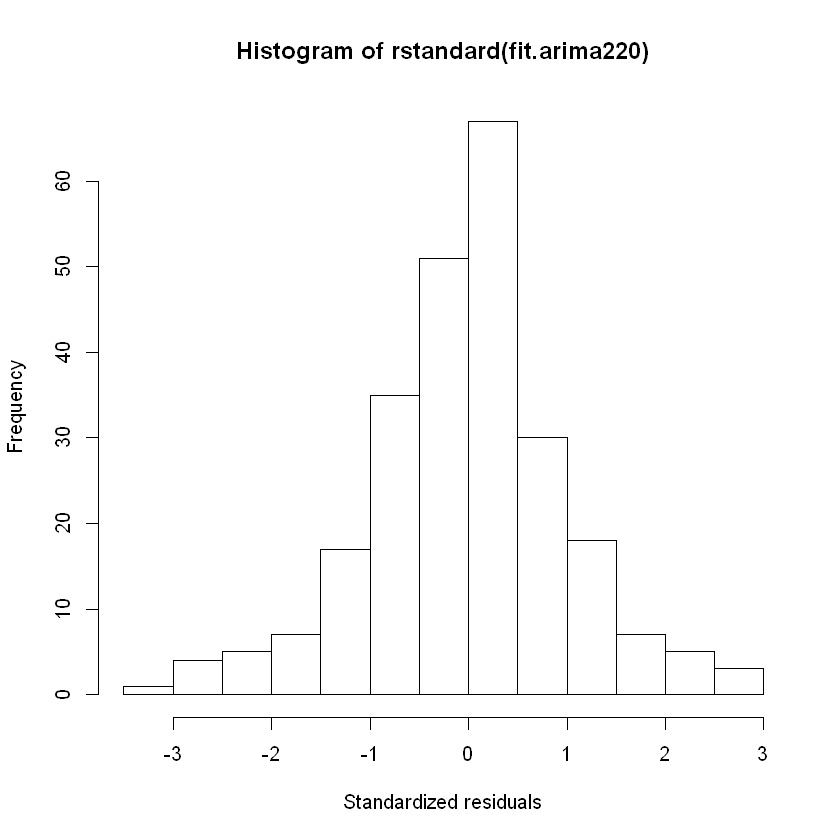

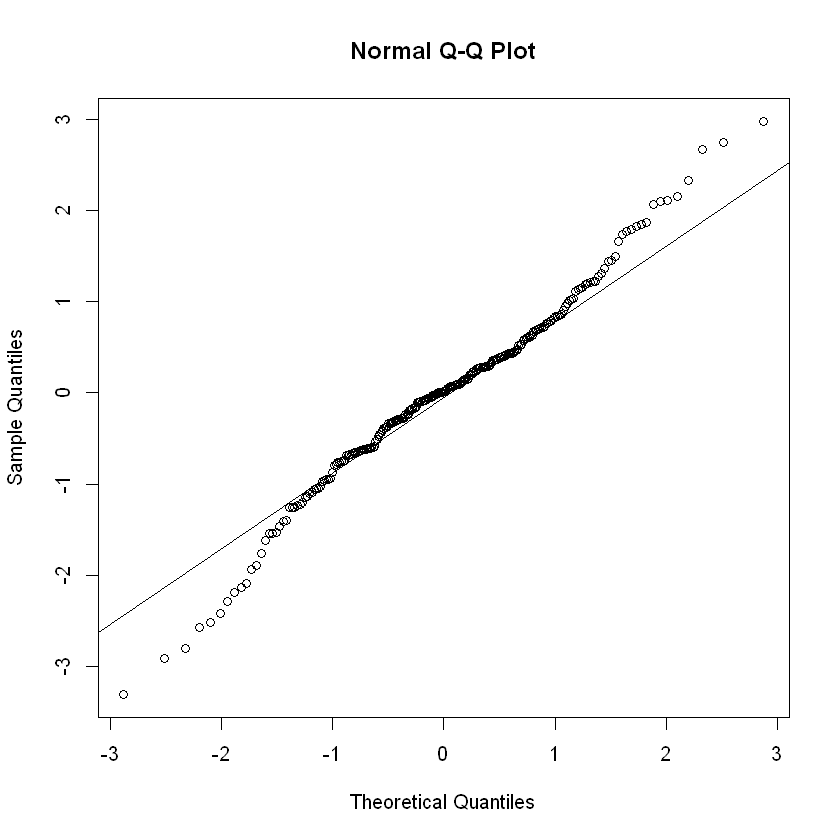

In [213]:
# standardized residuals
plot(rstandard(fit.arima220),xlab="Date",ylab="Standardized residuals",type="o")

# histogram of residuals
hist(rstandard(fit.arima220),xlab="Standardized residuals")

# qqplot
qqnorm(rstandard(fit.arima220))
qqline(rstandard(fit.arima220))

In [214]:
shapiro.test(rstandard(fit.arima220))


	Shapiro-Wilk normality test

data:  rstandard(fit.arima220)
W = 0.98154, p-value = 0.002465


**Since the p-value = 0.002465 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to indiciate that standardized residuals are not normally distributed at a significance level of 0.05. Therefore, the normality assumption is not met.**

In [215]:
runs(rstandard(fit.arima220))

$pvalue
[1] 0.0244

$observed.runs
[1] 144

$expected.runs
[1] 125.8

$n1
[1] 120

$n2
[1] 130

$k
[1] 0

**Since the p-value = 0.0244 < $\alpha$ = 0.05, we reject $H_0$. There is sufficient evidence to indiciate that standardized residuals are not independent at a significance level of 0.05. Therefore, independence assumption is not met.**

## ARIMA(3,2,1) model:

In [224]:
fit.arima321 <- arima(diff(diff(ibm_tranformed)),order=c(3,2,1),method = 'ML')
fit.arima321


Call:
arima(x = diff(diff(ibm_tranformed)), order = c(3, 2, 1), method = "ML")

Coefficients:
          ar1      ar2      ar3      ma1
      -1.2484  -0.9851  -0.4311  -1.0000
s.e.   0.0583   0.0769   0.0586   0.0104

sigma^2 estimated as 1.558e-08:  log likelihood = 1872.26,  aic = -3736.52

**AR1: 95% confidence interval for $\hat{\theta}$**
* -1.2484 $\pm$ 1.96 * 0.0583 = (-1.362668, -1.134132)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

**AR2: 95% confidence interval for $\hat{\theta}$**
* -0.9851 $\pm$ 1.96 * 0.0769 = (-1.135824, -0.834376)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

**AR3: 95% confidence interval for $\hat{\theta}$**
* -0.4311 $\pm$ 1.96 * 0.0586 = (-0.545956, -0.316244)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

**MA1: 95% confidence interval for $\hat{\theta}$**
* -1.0000 $\pm$ 1.96 * 0.0104 = (-1.020384, -0.979616)
* Since 0 is not in the interval, there is sufficient evidence to indicate that $\theta$ is signficantly different from 0.

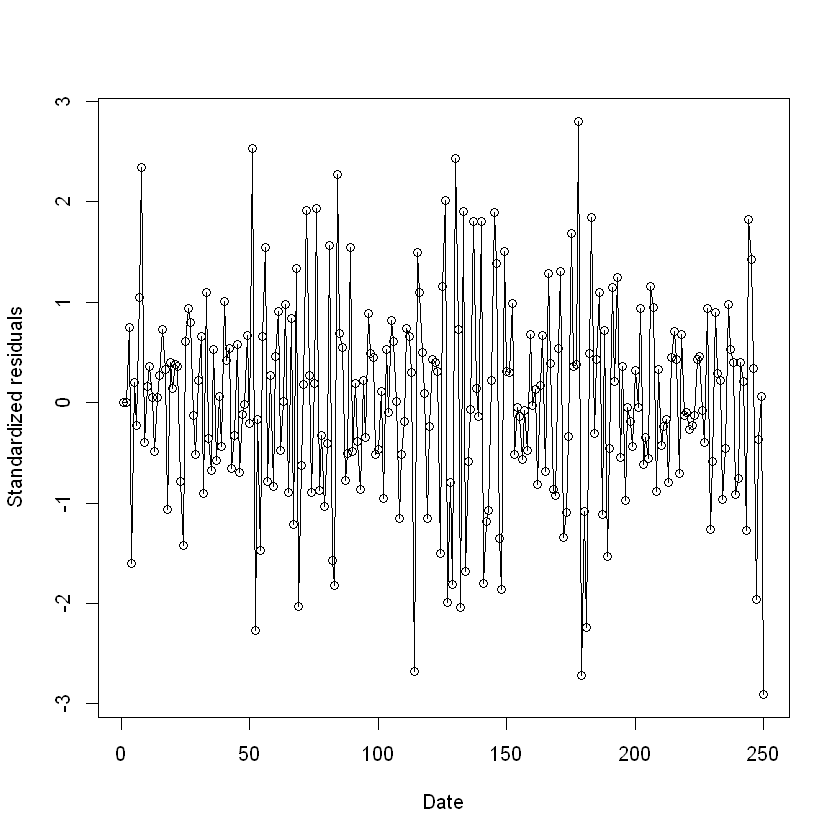

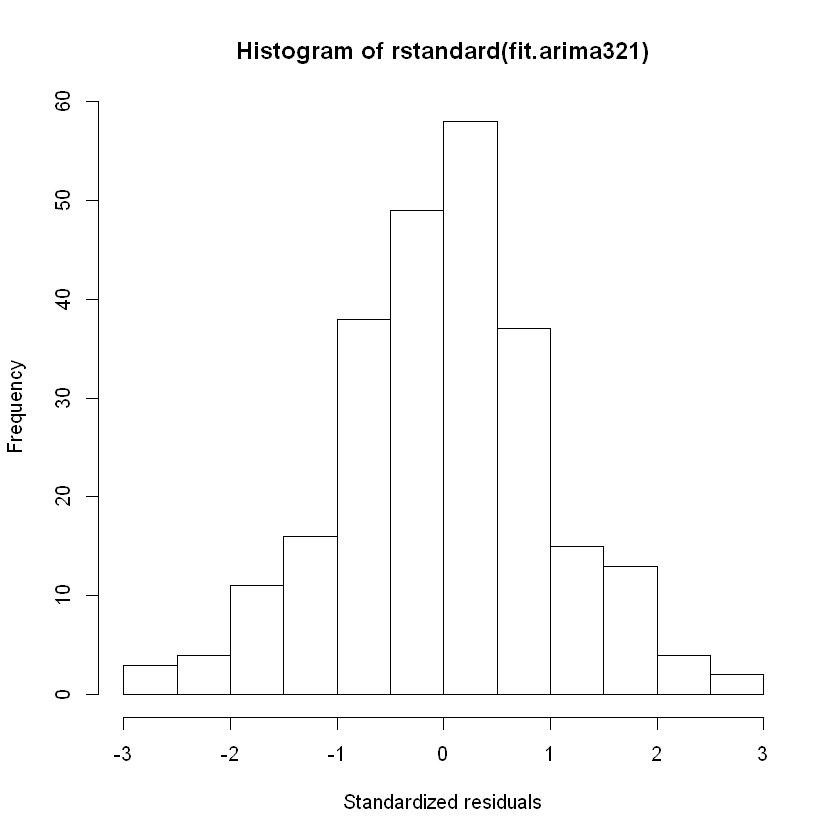

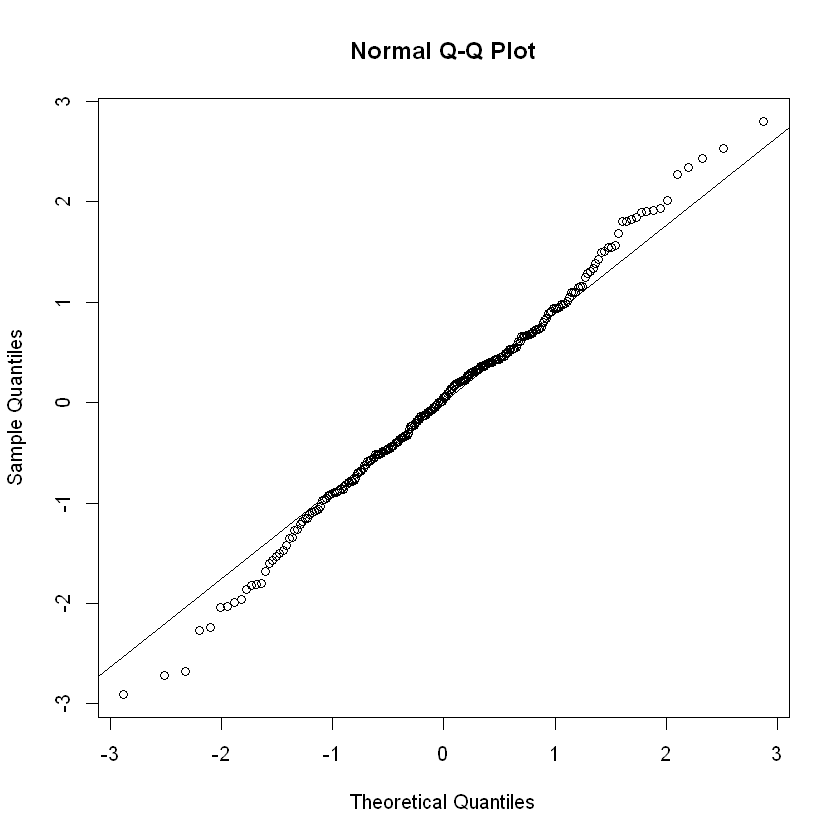

In [225]:
# standardized residuals
plot(rstandard(fit.arima321),xlab="Date",ylab="Standardized residuals",type="o")

# histogram of residuals
hist(rstandard(fit.arima321),xlab="Standardized residuals")

# qqplot
qqnorm(rstandard(fit.arima321))
qqline(rstandard(fit.arima321))

In [226]:
shapiro.test(rstandard(fit.arima321))


	Shapiro-Wilk normality test

data:  rstandard(fit.arima321)
W = 0.99433, p-value = 0.4748


**Since the p-value = 0.4748 > $\alpha$ = 0.05, we fail to reject $H_0$. There is insufficient evidence to <br>indiciate that standardized residuals are not normally distributed at a significance level of 0.05. <br>Therefore, the normality assumption is met.**

In [227]:
runs(rstandard(fit.arima321))

$pvalue
[1] 0.333

$observed.runs
[1] 134

$expected.runs
[1] 125.872

$n1
[1] 121

$n2
[1] 129

$k
[1] 0

**Since the p-value = 0.333 > $\alpha$ = 0.05, we fail to reject $H_0$. There is insufficient evidence to <br>indiciate that standardized residuals are not independent at a significance level of 0.05. <br>Therefore, independence assumption is met.**

## Forecasting with ARIMA(3,2,1)

#### Get training and testing set

In [280]:
# omit last 7 observations from training data
train <- head(ibm$Close, n=-7)

# set testing data to be last 7 observations
test <- tail(ibm$Close, n = 7)

#### Fit model with training data

In [281]:
training_fit_arima321 <- arima(diff(diff(ibm_tranformed)),order=c(3,2,1),method = 'ML')
training_fit_arima321


Call:
arima(x = diff(diff(ibm_tranformed)), order = c(3, 2, 1), method = "ML")

Coefficients:
          ar1      ar2      ar3      ma1
      -1.2484  -0.9851  -0.4311  -1.0000
s.e.   0.0583   0.0769   0.0586   0.0104

sigma^2 estimated as 1.558e-08:  log likelihood = 1872.26,  aic = -3736.52

#### Predict 30 days ahead

In [282]:
# options(repr.plot.width=7, repr.plot.height=7)

arima321.predict <- predict(training_fit_arima321, n.ahead=7)

**To omit backtranformation, we will apply a transformation and 2 diffference on the 7 last observation original data.**

In [283]:
# last 7 obs after 2 difference and a transformation
test <- tail(diff(diff(ibm_tranformed)), n = 7)
test

# last 7 from predicted model
arima321.predict$pred

[1]  2.853204e-04  6.541239e-05 -1.546254e-05 -1.476431e-04  1.448775e-04
[6] -4.794795e-05 -4.029080e-04

A Time Series:
[1]  1.019709e-04 -9.761678e-05 -1.949258e-04 -9.658137e-05 -3.956217e-05
[6] -1.677917e-04 -1.083898e-04

#### Prediction Interval

In [284]:
arima321_UP <- arima321.predict$pred + qnorm(0.975,0,1)*(arima321.predict$se)
arima321_LP <- arima321.predict$pred - qnorm(0.975,0,1)*(arima321.predict$se)

date <- tail(ibm$Date, 7)
data.frame(date, test, arima321.predict$pred, LP = arima321_LP, UP = arima321_UP)

date,test,arima321.predict.pred,LP,UP
<date>,<dbl>,<ts>,<ts>,<ts>
2020-01-23,2.853204e-04,1.019709e-04,-0.0001431939,3.471356e-04
2020-01-24,6.541239e-05,-9.761678e-05,-0.0003499929,1.547594e-04
2020-01-27,-1.546254e-05,-1.949258e-04,-0.0004598012,6.994971e-05
2020-01-28,-1.476431e-04,-9.658137e-05,-0.0003800871,1.869243e-04
2020-01-29,1.448775e-04,-3.956217e-05,-0.0003314694,2.523451e-04
2020-01-30,-4.794795e-05,-1.677917e-04,-0.0004611359,1.255524e-04
2020-01-31,-4.029080e-04,-1.083898e-04,-0.0004192035,2.024240e-04


#### Plot predicted and original data (k = 30)

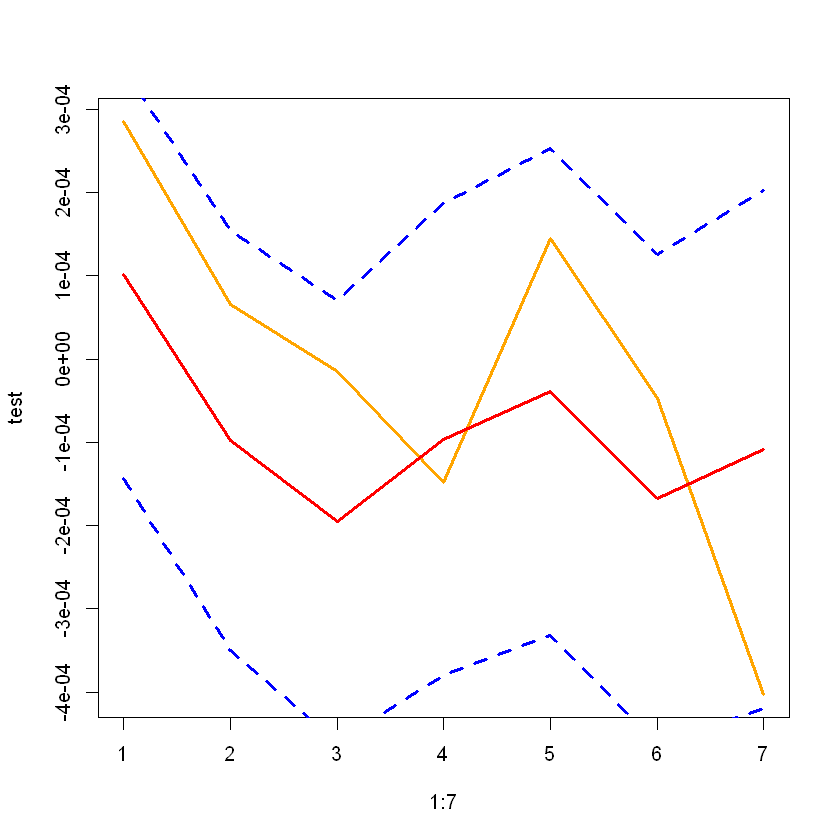

In [285]:
plot(1:7, test, type="l", col="orange", lwd = 3)
lines(1:7, arima321.predict$pred, col="red", lwd = 3)

lines(1:7, arima321_LP, col="blue", lty=2, lwd = 3)
lines(1:7, arima321_UP, col="blue", lty=2, lwd = 3)